In [2]:
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Import data https://www.kaggle.com/orgesleka/used-cars-database?select=autos.csv

Over 370,000 used cars scraped from Ebay Kleinanzeigen


In [37]:
data = pd.read_csv("autos_update.csv",sep=",")


C:\Users\lin37\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,7,9,12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437,2016-04-06 10:17:21;;;;;;;;


In [39]:
data.describe()

,kilometer,nrOfPictures
count,369211.000000,369211.000000
mean,125711.016289,0.767325
std,40047.781779,193.202665
min,0.000000,0.000000
25%,125000.000000,0.000000
50%,150000.000000,0.000000
75%,150000.000000,0.000000
max,150000.000000,59457.000000


In [40]:
data.shape

(371824, 20)

In [41]:
nb_ligne, nb_colonne = data.shape
#print("nb lignes : {nb_ligne}\nnb col: {nb_colonne}")

In [42]:
data.dtypes #Type donnée

dateCrawled             object
name                    object
seller                  object
offerType               object
price                   object
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerPS                 object
model                   object
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode              object
lastSeen;;;;;;;;        object
dtype: object

In [43]:
data.columns #Les noms des colonnes

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen;;;;;;;;'],
      dtype='object')

In [44]:
data.groupby("brand").kilometer.mean() #Le kilométrage moyen selon chaque marque de voiture.

brand
alfa_romeo        128966.036113
audi              129851.805309
bmw               132889.131143
chevrolet         100100.762527
chrysler          134000.000000
citroen           120594.155216
dacia              86463.687151
daewoo            123505.535055
daihatsu          119308.841843
fiat              116911.841148
ford              123879.357726
honda             125934.628975
hyundai           104830.157415
ja                     6.000000
jaguar            122261.513158
jeep              120991.271820
kia               109683.320220
lada               75563.063063
lancia            124422.268908
land_rover        119211.563732
mazda             126063.436123
mercedes_benz     130681.546603
mini               94686.567164
mitsubishi        127153.416557
nein                   7.500000
nissan            119785.386305
opel              128963.796037
peugeot           124980.870833
porsche            98685.424354
renault           128057.851240
rover             134621.676892
sa

In [45]:
#data["model"]

In [46]:
data.brand.count() #data.count() #Le nombre de modèle dans le dataset

369209

In [47]:
#data.groupby("brand").count() #Le nombre de 

In [49]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen;;;;;;;;'],
      dtype='object')

In [56]:
data.sort_values(by="kilometer")[20:]#Classement des voitures avec le moins de kilometrage

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
180154,2016-03-25 18:50:55,FIAT_126__geschweiste_Karrosse,privat,Angebot,500,test,NaN,1990,NaN,0,NaN,5000.0,0,NaN,fiat,NaN,2016-03-25 00:00:00,0.0,57250,2016-04-07 00:46:04;;;;;;;;
344629,2016-03-07 09:52:12,Volkswagen_Golf_3,privat,Angebot,50,control,NaN,2000,NaN,0,golf,5000.0,0,NaN,volkswagen,NaN,2016-03-07 00:00:00,0.0,19288,2016-03-07 09:52:12;;;;;;;;
41976,2016-04-03 15:45:31,Auto_zu_verkaufen,privat,Angebot,400,test,limousine,2001,manuell,120,primera,5000.0,0,benzin,nissan,ja,2016-04-03 00:00:00,0.0,13627,2016-04-05 14:46:21;;;;;;;;
255100,2016-03-23 20:53:24,Renault_Nevada_21_Pickup_/_Einzigartig,privat,Angebot,700,test,andere,1990,manuell,90,andere,5000.0,0,benzin,renault,ja,2016-03-23 00:00:00,0.0,91443,2016-04-06 02:16:48;;;;;;;;
344616,2016-04-01 23:44:14,ZU_VERSCHENKEN_AUTO,privat,Angebot,0,control,kleinwagen,1998,manuell,60,polo,5000.0,8,benzin,volkswagen,NaN,2016-04-01 00:00:00,0.0,69469,2016-04-01 23:44:14;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371215,"2016-03-17 10:48:44,Porsche_964/911_Carrera_2_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371396,"2016-03-08 22:48:38,Audi_A6_Avant_1.8_T_""Gothi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371403,"2016-03-28 14:47:20,BMW_318i_Facelift__17""_M_F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371618,"2016-03-07 17:48:40,Bmw_x5_3_0_D_Sportpaket_7_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data.groupby(data.gearbox).count()# Le nombre de voiture manuelle et automatique

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
gearbox,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
122,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
215,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
75,2,2,2,2,2,1,2,1,2,2,2,1,2,1,2,2,2,2,0
automatik,76458,76458,76458,76458,76458,76458,72326,76458,76458,72845,76458,76458,72467,76458,66062,76458,76458,76458,76458
manuell,272587,272587,272587,272587,272587,272587,249050,272587,272587,260004,272587,272587,252397,272587,224150,272587,272587,272587,272587


In [78]:
data.groupby("brand").count()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
brand,,,,,,,,,,,,,,,,,,,
alfa_romeo,2326,2326,2326,2326,2326,2326,2075,2326,2191,2326,2189,2326,2326,2100,1923,2326,2326,2326,2326
audi,32626,32626,32626,32626,32626,32626,30187,32626,31293,32626,31319,32626,32626,30346,27106,32626,32626,32626,32626
bmw,39903,39903,39903,39903,39903,39903,37052,39903,38397,39903,37932,39903,39903,36913,33180,39903,39903,39903,39903
chevrolet,1836,1836,1836,1836,1836,1836,1691,1836,1729,1836,1722,1836,1836,1673,1510,1836,1836,1836,1836
chrysler,1440,1440,1440,1440,1440,1440,1311,1440,1379,1440,1351,1440,1440,1317,1157,1440,1440,1440,1440
citroen,5167,5167,5167,5167,5167,5167,4636,5167,4893,5167,4919,5167,5167,4744,4170,5167,5167,5167,5167
dacia,895,895,895,895,895,895,844,895,873,895,873,895,895,836,793,895,895,895,895
daewoo,542,542,542,542,542,542,464,542,508,542,496,542,542,473,420,542,542,542,542
daihatsu,803,803,803,803,803,803,702,803,749,803,764,803,803,707,612,803,803,803,803


In [88]:
data[(data.brand=="bmw")].sort_values(by="price") #Erreur car donnée erroné

TypeError: '<' not supported between instances of 'float' and 'str'

In [90]:
data=data[(data.price != "#float")] #question au prof


NameError: name 'float64' is not defined

In [97]:
data.price.dtypes


dtype('O')

In [101]:
data[(data.model=="golf")].groupby(data.gearbox).count()#Le nombre de modèles golf

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
gearbox,,,,,,,,,,,,,,,,,,,,
automatik,3416,3416,3416,3416,3416,3416,3114,3416,3416,3416,3416,3416,3416,3255,3416,2911,3416,3416,3416,3416
manuell,24874,24874,24874,24874,24874,24874,21904,24874,24874,24874,24874,24874,24874,23160,24874,20124,24874,24874,24874,24874


In [104]:
data[(data.brand=="audi")].groupby("yearOfRegistration").count()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
yearOfRegistration,,,,,,,,,,,,,,,,,,,
1000.0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1
1600.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
1910.0,5,5,5,5,5,5,2,1,5,3,5,5,1,5,0,5,5,5,5
1939.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1953.0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,154,154,154,154,154,154,146,146,154,147,154,154,147,154,142,154,154,154,154
2016,213,213,213,213,213,213,12,198,213,178,213,213,143,213,132,213,213,213,213
2017,254,254,254,254,254,254,1,227,254,217,254,254,153,254,152,254,254,254,254


In [148]:
nb_renault= data[(data.brand=="renault")].groupby("yearOfRegistration").count()

In [149]:
nb_renault

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
yearOfRegistration,,,,,,,,,,,,,,,,,,,
1000.0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1
1910.0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1
1956.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1959.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1960.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25,25,25,25,25,25,24,25,25,25,25,25,23,25,25,25,25,25,25
2016,259,259,259,259,259,259,6,205,259,242,259,259,167,259,122,259,259,259,259
2017,236,236,236,236,236,236,0,203,236,219,236,236,147,236,143,236,236,236,236


In [158]:
nb_renault=nb_renault[(nb_renault.model >10)]

In [159]:
nb_renault

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
yearOfRegistration,,,,,,,,,,,,,,,,,,,
1990.0,18,18,18,18,18,18,13,15,18,16,18,18,13,18,12,18,18,18,18
1991.0,24,24,24,24,24,24,24,22,24,22,24,24,23,24,17,24,24,24,24
1992.0,31,31,31,31,31,31,30,30,31,29,31,31,24,31,23,31,31,31,31
1993.0,55,55,55,55,55,55,55,53,55,52,55,55,45,55,37,55,55,55,55
1994.0,67,67,67,67,67,67,66,66,67,62,67,67,59,67,49,67,67,67,67
1995.0,187,187,187,187,187,187,158,159,187,172,187,187,153,187,112,187,187,187,187
1996.0,298,298,298,298,298,298,297,286,298,280,298,298,265,298,203,298,298,298,298
1997.0,554,554,554,554,554,554,549,523,554,529,554,554,492,554,403,554,554,554,554
1998.0,698,698,698,698,698,698,696,667,698,661,698,698,633,698,503,698,698,698,698


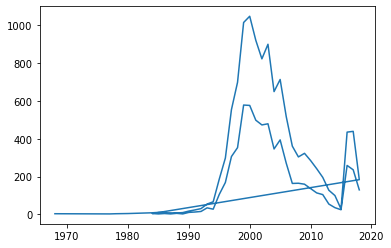

In [155]:
plt.plot(nb_renault.name)

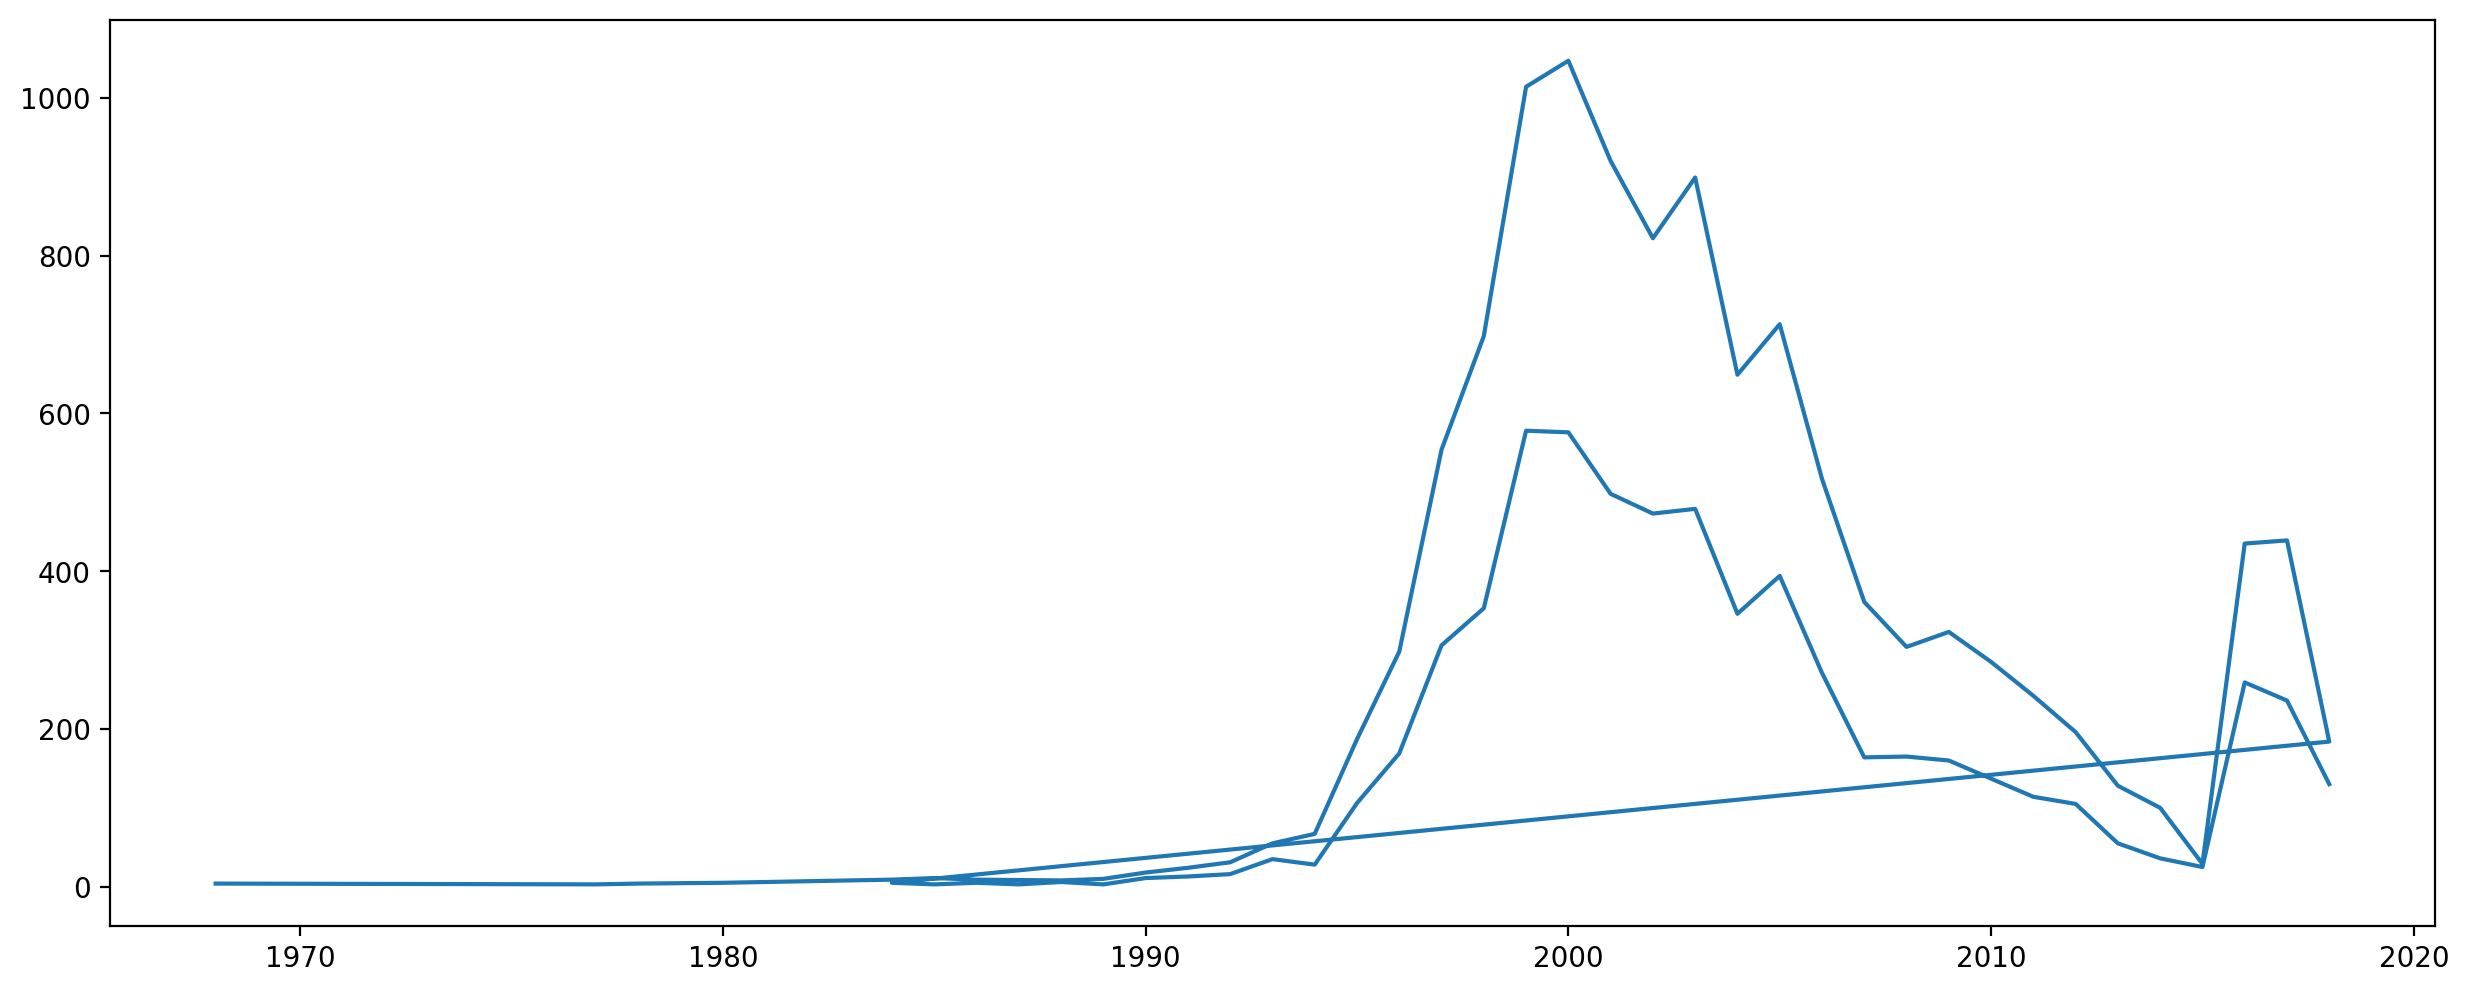

In [157]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
plt.plot(nb_renault.name)

In [172]:
#pivot_table_data=data.pivot_table(data.brand.count,index='yearOfRegistration',columns='gearbox',aggfunc=sum)

KeyError: <bound method Series.count of 0             volkswagen
1                   audi
2                    NaN
3             volkswagen
4                  skoda
               ...      
371819    sonstige_autos
371820             smart
371821        volkswagen
371822        volkswagen
371823               bmw
Name: brand, Length: 371824, dtype: object>

In [173]:
pivot_table_data.tail

<bound method NDFrame.tail of gearbox              122  133  215    75       automatik            manuell
yearOfRegistration                                                         
1000.0               NaN  NaN  NaN   NaN  sonstige_autos  porschevolkswagen
1200.0               NaN  NaN  NaN   NaN            fiat                NaN
1400.0               NaN  NaN  NaN   NaN             NaN         volkswagen
1500.0               NaN  NaN  NaN   NaN             NaN             subaru
1600.0               NaN  NaN  NaN   NaN             NaN               audi
...                  ...  ...  ...   ...             ...                ...
6000                 NaN  NaN  NaN   NaN             NaN               opel
7100                 NaN  NaN  NaN   NaN             NaN               fiat
7500                 NaN  NaN  NaN   NaN             NaN               seat
automatik            NaN   ja  NaN   NaN             NaN                NaN
manuell             nein  NaN    0  nein             NaN  

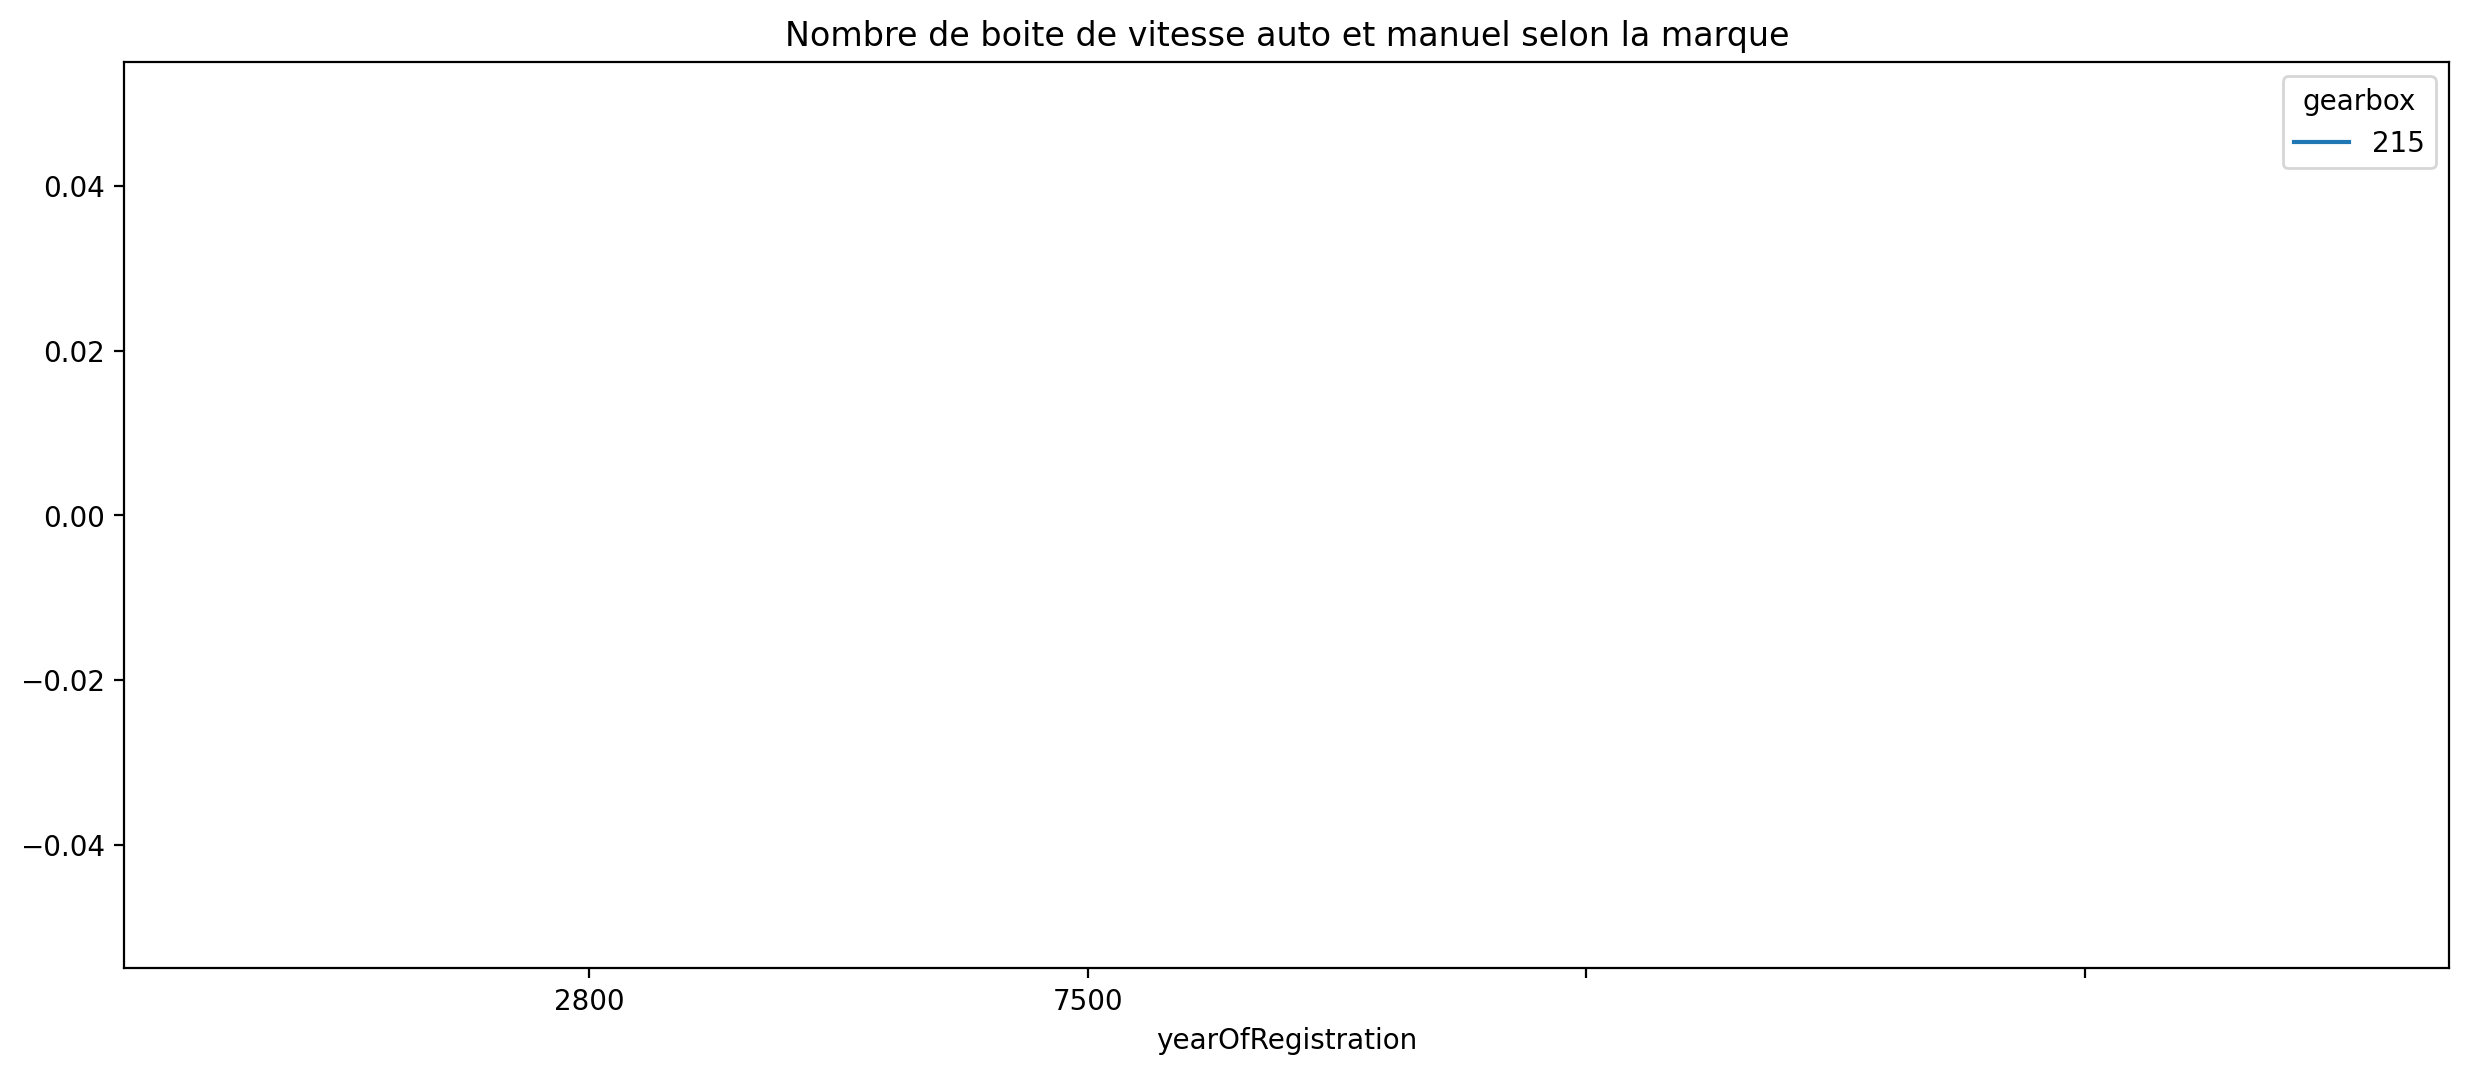

In [169]:
pivot_table_data.plot(title="Nombre de boite de vitesse auto et manuel selon la marque")